# <font color='red'>Importing libraries</font>

In [1]:
# Math, image processing and other useful libraries
from __future__ import print_function, unicode_literals, absolute_import, division
import os
import pandas as pd
import numpy as np
import cv2
from collections import OrderedDict
import copy
import math
import pickle
from matplotlib.ticker import MaxNLocator
from itertools import combinations

# Image processing
from skimage.measure import regionprops
from skimage.filters import meijering, sato, frangi, hessian, threshold_otsu
from skimage.morphology import extrema, skeletonize
from skimage.transform import probabilistic_hough_line
from skimage.draw import disk, circle_perimeter
from scipy.ndimage import gaussian_filter, grey_closing
from scipy.spatial import distance_matrix
from skimage import data, restoration, util
from roipoly import RoiPoly
from matplotlib_scalebar.scalebar import ScaleBar
from biosppy.signals import tools
from biosppy.stats import pearson_correlation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
import matplotlib.cm as pltc
import matplotlib.colors as colors
import seaborn as sns

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

# Feature Extraction (.py files by Teresa Parreira)
from CytoSkeletonPropsMorph import CytoSkeletonPropsMorph
from CytoSkeletonRegionPropsInt import RegionPropsInt
from FreqAnalysis import FreqAnalysis
from GLCM import GLCM

# Graph
import sknw
import networkx as nx
from scipy.signal import argrelextrema

# 
from skan import Skeleton, summarize,draw
from skan.csr import skeleton_to_csgraph, sholl_analysis,make_degree_image
import scipy as sp
import scipy.sparse
from matplotlib.patches import Circle
from ImageFeatures import ImageFeatures
from Functions import label_image, FeaturesFromCentroid, cv2toski,pylsdtoski,init_import,polar_to_cartesian, truncate_colormap, plot_hist, plot_pie, remove_not1D, quantitative_analysis,hist_bin,hist_lim,create_separate_DFs,getAAI,Others,branch,graphAnalysis,sholl
from fractal_dimension import fractal_dimension
from fractal_analysis_fxns import boxcount,boxcount_grayscale,fractal_dimension,fractal_dimension_grayscale,fractal_dimension_grayscale_DBC

print('📚')

C:\Users\diogo\AppData\Roaming\Python\Python37\site-packages\nose\importer.py:12: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import find_module, load_module, acquire_lock, release_lock
C:\Users\diogo\anaconda3\envs\Cytoskeleton\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\diogo\anaconda3\envs\Cytoskeleton\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` 

ModuleNotFoundError: No module named 'CytoSkeletonPropsMorph'

# <font color='red'>Import and Create DataFrame with available images</font>

In [3]:
global OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF
OriginalDF,DeconvDF,DenoisedDF,NoiseDF,NucleiDeconvDF,SyntheticDF = init_import()  # Import Images, add to DataFrame
Centroids = pickle.load(open('Centroids.p', 'rb'))
TextureDF = pd.read_pickle(os.getcwd() + "\\TextureDF.pkl")   
dir_masks = os.getcwd() + str("//nuclei_masks")

print('🌠')

NameError: name 'init_import' is not defined

In [14]:
#OriginalDF
#DeconvDF
#DenoisedDF
#NoiseDF
#NucleiDeconvDF
#Centroids
TextureDF

,Name,Index,Label,Skeleton
11,10_6IF_CHO_L_w3_(DAPI+Alexa 568)_PS.tif,11,WT,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
16,15_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,16,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18,17_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,18,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
20,19_IF6_CHO_L-W1_(DAPI+Alexa 568)_PS.tif,20,Mock,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
34,33_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,34,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
36,35_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,36,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
38,37_IF6_CHO_L-W5_(DAPI+Alexa 568)_PS.tif,38,No transfection,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
40,39_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,40,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
42,41_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,42,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
44,43_IF6_CHO_L-W6_(DAPI+Alexa 568)_PS.tif,44,Del38_46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# <font color='red'> Denoising Algorithm</font>

In [2]:
from z_logTV import z_logTV

#image = DeconvDF['Image'][2]
image = OriginalDF['Image'][11][:,:,2]
y     = image.ravel()
zin   = np.log(y+0.01)
alpha = 10
nlin  = image.shape[1]
ncol  = image.shape[0]
niter = 3

for it in range(niter):
    z    = z_logTV(zin,y,alpha,nlin,ncol)                 # Denoising
    xx   = z - zin                                        # Update
    zz   = z
    #erro = np.sqrt(np.dot(xx,xx))/np.sqrt(np.dot(zz,zz))  # Error
    
    #if (erro <= 10e-6 or it==niter):                      # Verify if error < threshold or nº iterations have been reached
    if it == niter:
        zin = z
        break
    
    print(it)                                             # Print iteration
    zin = z                                               # Update

# Reshape ravel to image shape
z = np.reshape(zin,(ncol,nlin))

NameError: name 'OriginalDF' is not defined

# <font color='red'> Plot Results</font>

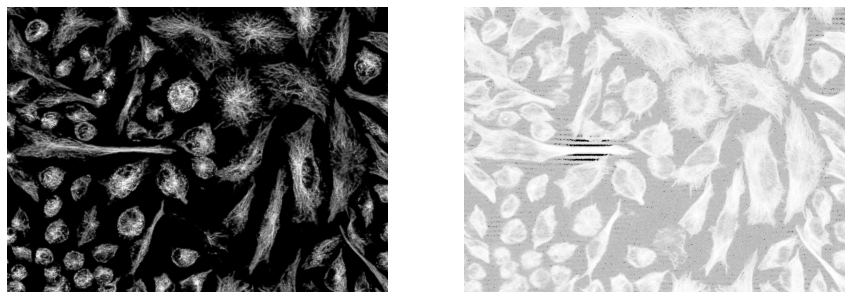

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(DeconvDF['Image'][11],cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(z,cmap='gray')
plt.axis('off')
plt.show()

**VER   .                  .      VVV**

In [113]:
from z_logTV import z_logTV

#image = DeconvDF['Image'][2]
image = OriginalDF['Image'][row['Index']][:,:,2]
y     = image.ravel()
zin   = np.log(y+0.01)
alpha = 0.01
nlin  = image.shape[1]
ncol  = image.shape[0]
niter = 100
tol = 1*10^-4

for it in range(niter):
    z    = z_logTV(zin,y,alpha,nlin,ncol)                 # Denoising
    xx   = z - zin                                        # Update
    zz   = z
    erro = np.sqrt(np.dot(xx,xx))/np.sqrt(np.dot(zz,zz))  # Error
    
    #if (erro <= 10e-6 or it==niter):                      # Verify if error < threshold or nº iterations have been reached
    if it == niter-1 or erro < tol:
        zin = z
        print('final = ',it)
        break
        
      
    if it%50 == 0:
        print(it)
    zin = z                                               # Update

# Reshape ravel to image shape
z = np.reshape(np.exp(zin),(ncol,nlin))

0
50
final =  99


In [114]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(OriginalDF.loc[ResultsDF['Img Index'][0]]['Image'][:,:,2],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(z,cmap='gray')

In [30]:
from z_logTV import z_logTV

ind = 9
image = OriginalDF['Image'][ind][:,:,2]
y     = image.ravel()
zin   = np.log(y+0.01)
alpha = 10
nlin  = image.shape[1]
ncol  = image.shape[0]
niter = 3

for it in range(niter):
    z    = z_logTV(zin,y,alpha,nlin,ncol)                 # Denoising
    xx   = z - zin                                        # Update
    zz   = z
    #erro = np.sqrt(np.dot(xx,xx))/np.sqrt(np.dot(zz,zz))  # Error
    
    #if (erro <= 10e-6 or it==niter):                      # Verify if error < threshold or nº iterations have been reached
    if it == niter:
        zin = z
        break
    
    print(it)                                             # Print iteration
    zin = z                                               # Update

# Reshape ravel to image shape
z = np.reshape(zin,(ncol,nlin))

0
1
2


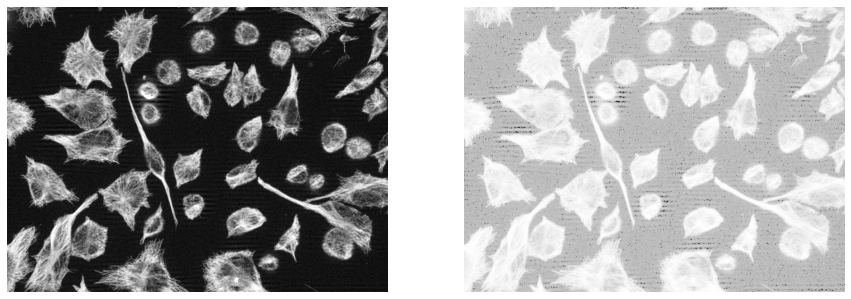

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(OriginalDF['Image'][ind][:,:,2],cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.reshape(zz,(ncol,nlin)),cmap='gray',vmin=0,vmax=0.3)
plt.axis('off')
plt.show()

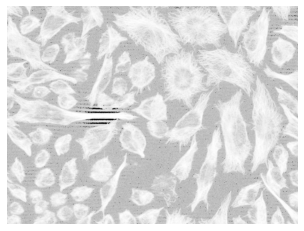

In [26]:
test = ((z - z.min()) * (1/(z.max() - z.min()) * 255)).astype('uint8')
plt.imshow(test,cmap='gray')
plt.axis('off')
plt.show()